###  https://ps.is.tue.mpg.de/research_projects/facade-segmentation

In [7]:
from resnet_pytorch import ResNet
import matplotlib.pyplot as plt
model = ResNet.from_pretrained("resnet18")

Loaded pretrained weights for resnet18.


In [4]:
import json

import torch
import torchvision.transforms as transforms
from PIL import Image

from resnet_pytorch import ResNet 

# Open image
input_image = Image.open("inputs/images/example_photo_training.jpg")

# Preprocess image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

# Load class names
labels_map = json.load(open("labels_map.txt"))
labels_map = [labels_map[str(i)] for i in range(1000)]

# Classify with ResNet18
model = ResNet.from_pretrained("resnet18")
model.eval()

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to("cuda")
    model.to("cuda")

with torch.no_grad():
    logits = model(input_batch)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print("-----")
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print(f"{label:<75} ({prob * 100:.2f}%)")

Loaded pretrained weights for resnet18.
-----
palace                                                                      (37.97%)
prison, prison house                                                        (15.58%)
cinema, movie theater, movie theatre, movie house, picture palace           (8.55%)
streetcar, tram, tramcar, trolley, trolley car                              (4.82%)
amphibian, amphibious vehicle                                               (2.98%)


In [5]:
if 698 in preds:
    print('there is a palace in the photo')

there is a palace in the photo


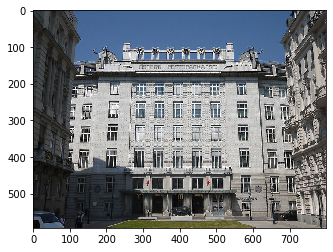

In [8]:
plt.imshow(input_image)

In [ ]:
import cv2

im =  cv2.imread("images/1.JPG")

imgheight=im.shape[0]
imgwidth=im.shape[1]

y1 = 0
M = imgheight//3
N = imgwidth//3

for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        y1 = y + M
        x1 = x + N
        tiles = im[y:y+M,x:x+N]

        cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
        cv2.imwrite("save/" + str(x) + '_' + str(y)+".png",tiles)

cv2.imwrite("asas.png",im)

In [ ]:
for i in 

In [ ]:
def check_buildings(image):

    # Preprocess image
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

    # Load class names
    labels_map = json.load(open("labels_map.txt"))
    labels_map = [labels_map[str(i)] for i in range(1000)]

    # Classify with ResNet18
    model = ResNet.from_pretrained("resnet18")
    model.eval()

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to("cuda")
        model.to("cuda")

    with torch.no_grad():
        logits = model(input_batch)
    preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

    print("-----")
    for idx in preds:
        label = labels_map[idx]
        prob = torch.softmax(logits, dim=1)[0, idx].item()
        print(f"{label:<75} ({prob * 100:.2f}%)")
    return preds

In [ ]:
def split_image(preds, path):
    if 698 in preds:
        im =  cv2.imread(path+"paris_000.png")
        im = cv2.resize(im,(1000,500))

        imgheight=im.shape[0]
        imgwidth=im.shape[1]

        y1 = 0
        M = imgheight//20
        N = imgwidth//20

        for y in range(0,imgheight,M):
            for x in range(0, imgwidth, N):
                y1 = y + M
                x1 = x + N
                tiles = im[y:y+M,x:x+N]

                cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
                cv2.imwrite("save/" + str(x) + '_' + str(y)+".png",tiles)

        cv2.imwrite("asas.png",im)

In [ ]:
input_image = Image.open("1.JPG")

In [ ]:
preds = check_buildings(input_image)

In [ ]:
split_image(preds, input_image)

In [ ]:
import cv2

im =  cv2.imread("images/de_convertir/paris/paris_000.png")
im = cv2.resize(im,(1000,500))

imgheight=im.shape[0]
imgwidth=im.shape[1]

y1 = 0
M = imgheight//20
N = imgwidth//20

for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        y1 = y + M
        x1 = x + N
        tiles = im[y:y+M,x:x+N]

        cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
        cv2.imwrite("save/" + str(x) + '_' + str(y)+".png",tiles)

cv2.imwrite("asas.png",im)

In [ ]:
import torch
from resnet_pytorch import ResNet 
model = ResNet.from_pretrained('resnet18')

# ... image preprocessing as in the classification example ...
inputs = torch.randn(1, 3, 224, 224)
print(inputs.shape) # torch.Size([1, 3, 224, 224])

features = model.extract_features(inputs)
print(features.shape) # torch.Size([1, 512, 1, 1])

In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
model = smp.Unet()

In [ ]:
from segmentation_models_pytorch.encoders import get_preprocessing_fn

preprocess_input = get_preprocessing_fn('resnet18', pretrained='imagenet')

In [ ]:
seg = model.segmentation_head

In [ ]:
seg(features)

In [ ]:
from torchvision import models

In [ ]:
import torchvision.transforms as tt

In [ ]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [ ]:
def generateMask(img,net=fcn):
    trf = tt.Compose([tt.ToTensor(), 
                   tt.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    return rgb

In [ ]:
print(features.shape) 

In [ ]:
rgb = generateMask(input_image)

In [ ]:
import torch
from torchvision import models
import torchvision.transforms as tt
import numpy as np

fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

def resizeImg(img,dimension=256):
    t=tt.Compose([tt.Resize(dimension)])
    img=t(img)
    return img

def generateMask(img,net=fcn):
    trf = tt.Compose([tt.ToTensor(), 
                   tt.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    return rgb

In [ ]:
input_image = Image.open("images/de_convertir/paris/paris_000.png")

In [ ]:
mask = generateMask(input_image)
background_mask = np.all(mask == [0, 0, 0], axis=-1)
foreground_mask = np.any(mask != [0, 0, 0], axis=-1)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background_mask)